<a href="https://colab.research.google.com/github/keremshns/tensorflow_developer/blob/main/mnist_handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
#LOAD/SPLIT/INSPECT DATA
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

num_train_images = len(x_train)
img_shape = x_train[0].shape
labels_shape = y_train.shape

print("There are ", num_train_images, "images.")
print("Shape of an image: ",img_shape)
print("There are ", num_train_images, "labels.",labels_shape)

11490434/11490434 [==============================] - 0s 0us/step
60000
(28, 28)
(60000,)


In [10]:
#FUNCTION FOR NORMALIZATION
def normalizer(x_train, y_train, x_test, y_test):
  x_train = x_train/255.0
  x_test = x_test/255.0

  return (x_train, y_train), (x_test,y_test)


#FUNCTION FOR INSTANTIATING DATA GENERATOR OBJECTS
def create_generators(x_train, y_train, x_test, y_test):

  train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                           rotation_range=15,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                            shear_range=0.2,
                                                           zoom_range=0.1)

  val_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                          rotation_range=15,
                                                         width_shift_range=0.2,
                                                          height_shift_range=0.2,
                                                          shear_range=0.2,
                                                         zoom_range=0.1)
  return train_generator, val_generator





In [17]:
#RUN WHEN USING IMAGE DATA GENERATOR
#OBTAINING AUGMENTED DATA
train_generator, val_generator = create_generators(x_train, y_train, x_test, y_test)

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

train_generator = train_generator.flow(x_train,
                                       y_train,
                                       batch_size=256
                                       )

val_generator = val_generator.flow(x_test,
                                   y_test,
                                   batch_size=256,
                                   )


In [ ]:
#RUN WHEN USING NORMALIZER
#JUST FOR PREPROCESSING THE DATA IF YOU DONT WANT TO USE IMAGE GENERATOR
(x_train, y_train), (x_test, y_test) = normalizer(x_train, y_train, x_test, y_test)

In [21]:
#HYPERPARAMETERS
epochs = 50

In [22]:
model = tf.keras.Sequential([

        tf.keras.layers.Conv2D(64, (2,2), input_shape=(28,28,1), padding="same"),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(32, (2,2), padding="same"),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(16, (2,2), padding="same"),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.GlobalMaxPool2D(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),

])

model.summary()

callback = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10**(epochs/10))

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=[callback])



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 60)        300       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 60)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 30)        7230      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 30)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 10)          1210      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 10)        

Epoch 1/50
235/235 [==============================] - 24s 93ms/step - loss: 2.2753 - accuracy: 0.1671 - val_loss: 2.1876 - val_accuracy: 0.2265 - lr: 1.0000e-04
Epoch 2/50
235/235 [==============================] - 23s 96ms/step - loss: 1.9221 - accuracy: 0.3228 - val_loss: 1.6889 - val_accuracy: 0.4163 - lr: 1.2589e-04
Epoch 3/50
235/235 [==============================] - 21s 91ms/step - loss: 1.4879 - accuracy: 0.4928 - val_loss: 1.2973 - val_accuracy: 0.5573 - lr: 1.5849e-04
Epoch 4/50
235/235 [==============================] - 22s 94ms/step - loss: 1.1854 - accuracy: 0.5921 - val_loss: 1.0488 - val_accuracy: 0.6313 - lr: 1.9953e-04
Epoch 5/50
235/235 [==============================] - 25s 107ms/step - loss: 0.9954 - accuracy: 0.6573 - val_loss: 0.8919 - val_accuracy: 0.6947 - lr: 2.5119e-04
Epoch 6/50
235/235 [==============================] - 25s 105ms/step - loss: 0.8639 - accuracy: 0.7073 - val_loss: 0.7909 - val_accuracy: 0.7294 - lr: 3.1623e-04
Epoch 7/50
235/235 [============

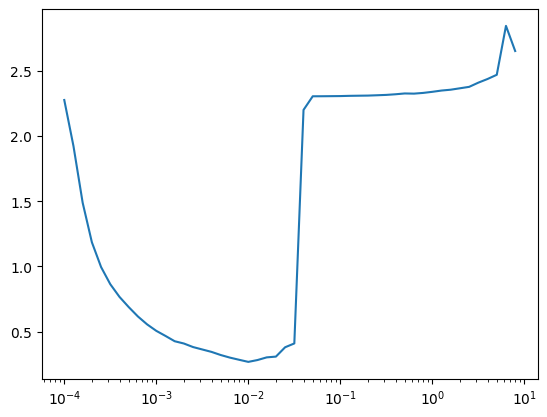

In [23]:
lr = history.history["lr"]
loss = history.history["loss"]
accuracy = history.history["accuracy"]

plt.semilogx(lr,loss)

In [ ]:
model = tf.keras.Sequential([

        tf.keras.layers.Conv2D(60, (2,2), input_shape=(28,28,1), padding="same"),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(30, (2,2), padding="same"),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(10, (2,2), padding="same"),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.GlobalMaxPool2D(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),

])

model.summary()


optimizer = tf.keras.optimizers.Adam(lr=2e-3)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 60)        300       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 30)        7230      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 7, 7, 30)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 7, 7, 10)          1210      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 3, 3, 10)        

Epoch 1/20
1875/1875 [==============================] - 12s 5ms/step - loss: 0.7076 - accuracy: 0.7671 - val_loss: 0.3396 - val_accuracy: 0.8920
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3401 - accuracy: 0.8941 - val_loss: 0.3080 - val_accuracy: 0.9036
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2821 - accuracy: 0.9118 - val_loss: 0.2381 - val_accuracy: 0.9272
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2407 - accuracy: 0.9247 - val_loss: 0.2395 - val_accuracy: 0.9245
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2160 - accuracy: 0.9317 - val_loss: 0.2052 - val_accuracy: 0.9348
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2004 - accuracy: 0.9359 - val_loss: 0.2028 - val_accuracy: 0.9370
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1893 - accuracy: 0.9389 - val_loss: 0.2066 - val_accuracy

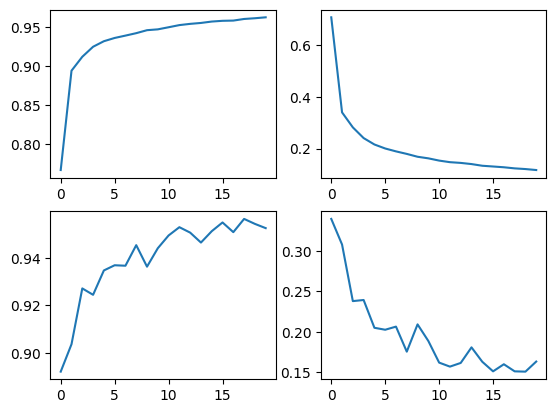

In [ ]:
accuracy = history.history["accuracy"]
loss = history.history["loss"]
val_accuracy = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure()
plt.subplot(2,2,1)
plt.plot(range(epochs),accuracy)
plt.subplot(2,2,2)
plt.plot(range(epochs),loss)
plt.subplot(2,2,3)
plt.plot(range(epochs),val_accuracy)
plt.subplot(2,2,4)
plt.plot(range(epochs),val_loss)


plt.show()
